# Internship Final Project

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
%matplotlib inline

In [4]:
if 'tf' in globals():  
    #if (len(gpu) > 0):
    print("GPU Active: ", len(tf.test.gpu_device_name()))
        #tf.config.experimental.set_memory_growth(gpu[0], True)
    #else:
        #print("No Active/Configured GPU")
else:
    print("Not Using Tensorflow!!!\nInstall Tensorflow...")


GPU Active:  0


# Module 1: Dataset Preperation

In [5]:
dataset = "C:/Users/LUNA/Desktop/Internship Results/aircraft"
categories = ['airliner', 'missile', 'drone', 'fighter-jet', 'helicopter']
#categories = ['missile', 'helicopter']
trainName = "Aircraft-Classification-{}".format(int(time.time()))

#### Warning: Increasing the imageSize variable will increase time of execution.

In [6]:
imageSize = 100

# Dataset Training

In [7]:
training = []

def training_data():
    for category in categories:
        path = os.path.join(dataset, category)
        classEnum = categories.index(category)

        for image in os.listdir(path):
            try:
                imageArr = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                tmpArr = cv2.resize(imageArr, (imageSize, imageSize))
                training.append([tmpArr, classEnum])
            except Exception as e:
                pass

training_data()

In [8]:
random.shuffle(training)

(100, 100, 1)

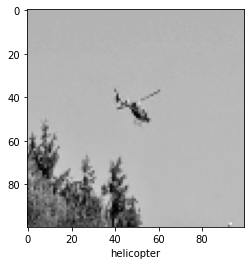

In [9]:
trainX = []
trainY = []

for features, label in training:
    trainX.append(features)
    trainY.append(label)

trainX = np.array(trainX).reshape(-1, imageSize, imageSize, 1)
trainY = np.array(trainY)
trainY = trainY.reshape(-1,)

plt.imshow(trainX[0], cmap="gray")
plt.xlabel(categories[int(trainY[0])])
trainX[0].shape

In [10]:
pickle_out = open('trainX.pickle', 'wb')
pickle.dump(trainX, pickle_out)
pickle_out.close()

pickle_out = open('trainY.pickle', 'wb')
pickle.dump(trainY, pickle_out)
pickle_out.close()

print("All Operations Above Completed.")

All Operations Above Completed.


# Module 2: Convolutional Neural Network

#### The code directly below is a non-working CNN solution. There is an issue when using 'Categorical-Crossenrtopy'. It is a good solution for 'Binary-Crossentropy' when using only two sets of data for classification.

In [11]:
##xData = pickle.load(open('trainX.pickle', 'rb'))
##yData = pickle.load(open('trainY.pickle', 'rb'))

##xData = xData/255.0
#xData = trainX/255.0
#model = Sequential()
#model.add(Conv2D(64, (3,3), input_shape=xData.shape[1:]))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(64, (3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Flatten())
#model.add(Dense(64))
#model.add(Activation('relu'))

#model.add(Dense(1))
#model.add(Activation('softmax'))

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#xData = np.array(xData)
#yData = np.array(yData)
#model.fit(xData, yData, batch_size=64, epochs=1)

#model.save('theConvNet.model')

#### The code directly below works with the current dataset. It uses 'sparse-categorical-crossentropy' instead of 'categorical-crossentropy'. There could be an issue with the shape of the training data, when using 'categorical-crossentropy'. However, since this CNN setup works, I will leave the other issues behind for future research.

In [12]:
tensorboard = TensorBoard(log_dir='logs/{}'.format(trainName))

neuralnet = models.Sequential([layers.Conv2D(filters=32, kernel_size=(3,3), 
                                       activation='relu', input_shape=(imageSize, imageSize, 1)), 
                        layers.MaxPooling2D((2,2)),
                        
                        layers.Conv2D(filters=32, kernel_size=(3,3), 
                                       activation='relu', input_shape=(imageSize, imageSize, 1)), 
                        layers.MaxPooling2D((2,2)), 
                               
                        layers.Conv2D(filters=32, kernel_size=(3,3), 
                                       activation='relu', input_shape=(imageSize, imageSize, 1)), 
                        layers.MaxPooling2D((2,2)),
                               
                        layers.Conv2D(filters=32, kernel_size=(3,3), 
                                       activation='relu', input_shape=(imageSize, imageSize, 1)), 
                        layers.MaxPooling2D((2,2)),
                               
                        layers.Conv2D(filters=32, kernel_size=(3,3), 
                                       activation='relu', input_shape=(imageSize, imageSize, 1)), 
                        layers.MaxPooling2D((2,2)),
                        
                        layers.Flatten(), layers.Dense(64, activation='relu'),
                        layers.Dense(6, activation='softmax')])

neuralnet.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = neuralnet.fit(trainX, trainY, epochs=50, validation_split=0.1, callbacks=[tensorboard])

neuralnet.save('theConvNet.model')

Epoch 1/50
206/206 [==============================] - 17s 82ms/step - loss: 1.6627 - accuracy: 0.2617 - val_loss: 1.5210 - val_accuracy: 0.3465
Epoch 2/50
206/206 [==============================] - 16s 80ms/step - loss: 1.5016 - accuracy: 0.3475 - val_loss: 1.5426 - val_accuracy: 0.3097
Epoch 3/50
206/206 [==============================] - 17s 81ms/step - loss: 1.4374 - accuracy: 0.3847 - val_loss: 1.4290 - val_accuracy: 0.3861
Epoch 4/50
206/206 [==============================] - 16s 80ms/step - loss: 1.3979 - accuracy: 0.4076 - val_loss: 1.4308 - val_accuracy: 0.3765
Epoch 5/50
206/206 [==============================] - 17s 81ms/step - loss: 1.3702 - accuracy: 0.4231 - val_loss: 1.3875 - val_accuracy: 0.4270
Epoch 6/50
206/206 [==============================] - 16s 80ms/step - loss: 1.3401 - accuracy: 0.4413 - val_loss: 1.4061 - val_accuracy: 0.4161
Epoch 7/50
206/206 [==============================] - 17s 82ms/step - loss: 1.2924 - accuracy: 0.4613 - val_loss: 1.3693 - val_accuracy:

In [13]:
print("All Operation Above Completed.")

All Operation Above Completed.


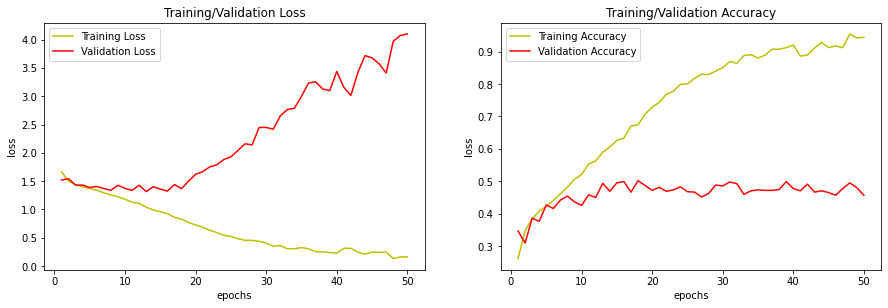

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
loss = history.history['loss']
valLoss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, valLoss, 'r', label='Validation Loss')
plt.title('Training/Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(2,2,2)
accu = history.history['accuracy']
valAccu = history.history['val_accuracy']
plt.plot(epochs, accu, 'y', label='Training Accuracy')
plt.plot(epochs, valAccu, 'r', label='Validation Accuracy')
plt.title('Training/Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Module 3: Using the CNN to Classify An Image

In [15]:
def imageFile(file):
    inputImg = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    tmpImg = cv2.resize(inputImg, (imageSize, imageSize))
    return tmpImg.reshape(-1, imageSize, imageSize, 1)

model = tf.keras.models.load_model('theConvNet.model')

In [16]:
def prediction(file):
    yPred = neuralnet.predict([imageFile(file+'.jpg')])
    print("File: '", file, "', Was Classified as:", categories[np.argmax(yPred[0])])

In [17]:
def showImage(file):
    inputImg = cv2.imread((file+'.jpg'), cv2.IMREAD_GRAYSCALE)
    tmpImg = cv2.resize(inputImg, (imageSize, imageSize))
    plt.imshow(tmpImg, cmap='gray')

#### Classify: Missiles

In [18]:
prediction('inputAGM86')
prediction('inputPatriot')
prediction('inputJASSM')
prediction('inputHellfire')

File: ' inputAGM86 ', Was Classified as: airliner
File: ' inputPatriot ', Was Classified as: missile
File: ' inputJASSM ', Was Classified as: missile
File: ' inputHellfire ', Was Classified as: drone


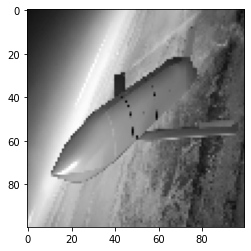

In [19]:
showImage('inputJASSM')

#### Classify: Ainliners

In [20]:
prediction('inputAirline')
prediction('inputUA')
prediction('inputUA2')
prediction('inputUPS')
prediction('inputUPS2')

File: ' inputAirline ', Was Classified as: airliner
File: ' inputUA ', Was Classified as: airliner
File: ' inputUA2 ', Was Classified as: airliner
File: ' inputUPS ', Was Classified as: airliner
File: ' inputUPS2 ', Was Classified as: airliner


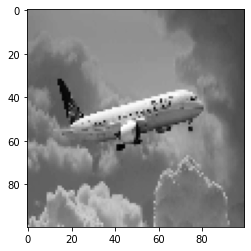

In [21]:
showImage('inputUA2')

#### Classify: Drones

In [22]:
prediction('inputDrone')
prediction('inputDrone2')

File: ' inputDrone ', Was Classified as: drone
File: ' inputDrone2 ', Was Classified as: drone


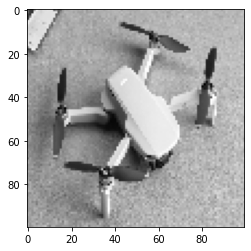

In [23]:
showImage('inputDrone2')

#### Classify: Fighter

In [24]:
prediction('inputF22')
prediction('inputF22-2')
prediction('inputTomcat')
prediction('inputTomcat2')

File: ' inputF22 ', Was Classified as: fighter-jet
File: ' inputF22-2 ', Was Classified as: drone
File: ' inputTomcat ', Was Classified as: fighter-jet
File: ' inputTomcat2 ', Was Classified as: drone


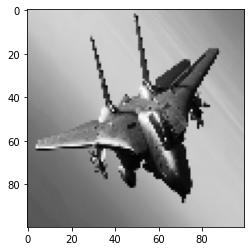

In [25]:
showImage('inputTomcat2')

#### Classify: Helicopter

In [26]:
prediction('inputRescue')
prediction('inputHeli')

File: ' inputRescue ', Was Classified as: fighter-jet
File: ' inputHeli ', Was Classified as: helicopter


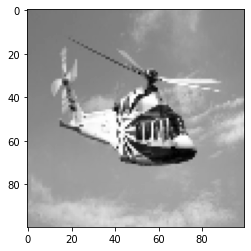

In [27]:
showImage('inputHeli')

# References:

####    TensorFlow CNN: 
    https://www.tensorflow.org/tutorials/images/cnn
####    TensorFlow Python Functions: 
    https://www.tensorflow.org/api_docs/python/tf
####    Keras Python Functions: 
    https://keras.io/api/models/
####    MatPlotLib Python Functions: 
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
####    TensorFlow GPU Support: 
    https://www.tensorflow.org/install/gpu
####    Keras Image Classification: 
    https://keras.io/examples/vision/image_classification_from_scratch/
####    Kaggle Aircraft Dataset: 
    https://www.kaggle.com/eabdul/flying-vehicles
